In [1]:
import cv2
import math
import imutils
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

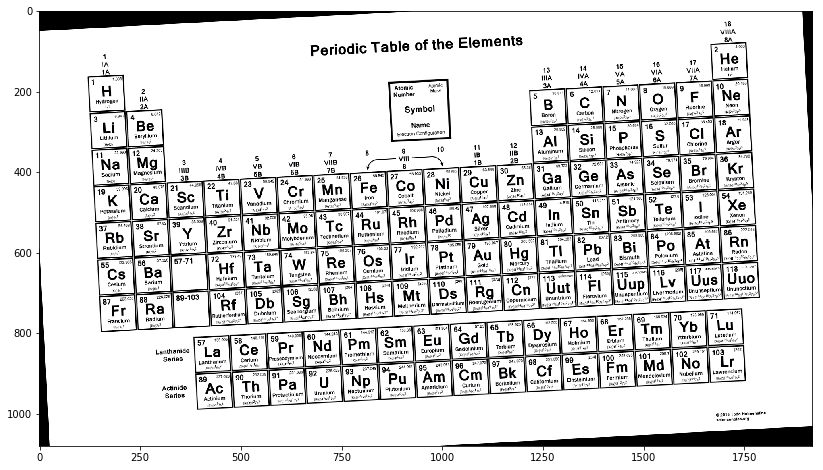

In [2]:
image = cv2.imread("image_rotated.png")

plt.figure(figsize=(20,8))
plt.imshow(image)

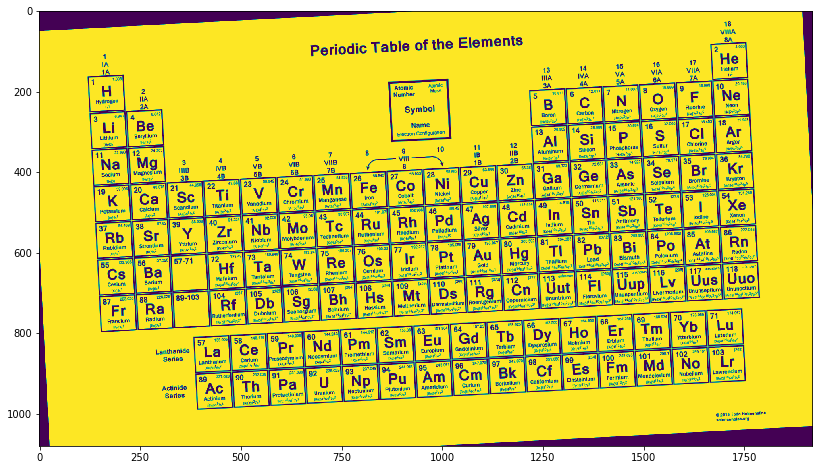

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,8))
plt.imshow(gray)

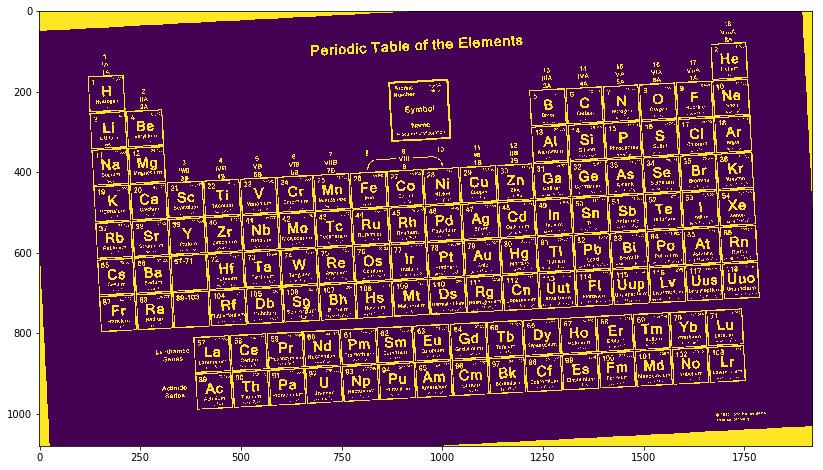

In [4]:
_ , img_bin = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
kernel_length = np.array(image).shape[1]//100

plt.figure(figsize=(20,8))
plt.imshow(img_bin)

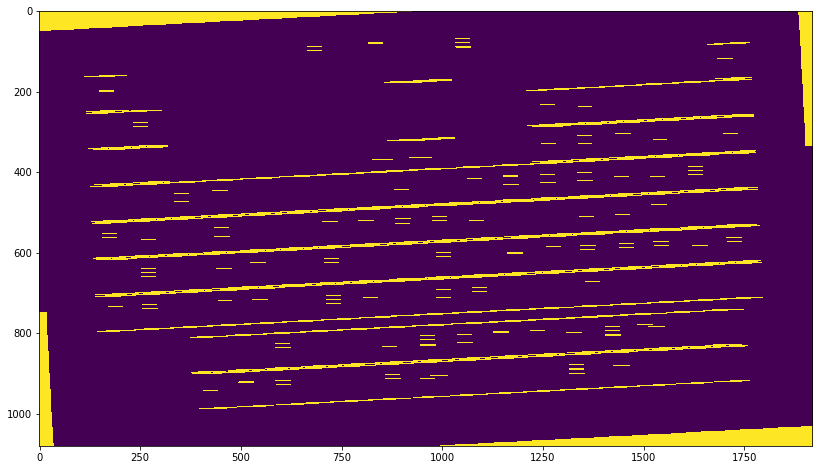

In [5]:
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
img_temp = cv2.erode(img_bin, hori_kernel, iterations=1)
horizontal_lines_img = cv2.dilate(img_temp, hori_kernel, iterations=2)

plt.figure(figsize=(20,8))
plt.imshow(horizontal_lines_img)

In [6]:
im2 , hier = cv2.findContours(horizontal_lines_img.copy(),
                             cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rows, cols = image.shape[:2]
lista_angulos = []
for k, ctr in enumerate(reversed(im2)):      
        x, y, w, h = cv2.boundingRect(ctr) 
        if w > 1600:
            
            vx, vy, x , y  = cv2.fitLine(ctr, cv2.DIST_L2,0,0,0)
            
            left = (-x * vy/vx) + y
            right = ((cols - x) * vy/vx) + y
            
            x_final = cols
            y_final = right
            x_init = 0
            y_init = left
            
            w = x_final - x_init
            h = y_final - y_init
            
            arctg = (math.atan2(h, w) * 180) / math.pi
            
            lista_angulos.append(arctg)
            
            
arctg = np.sum(lista_angulos) / len(lista_angulos)

cv2.imwrite("image_corrected_rotation.png", imutils.rotate(image, arctg))

print("angulo:", arctg)

angulo: -2.9982238900716305


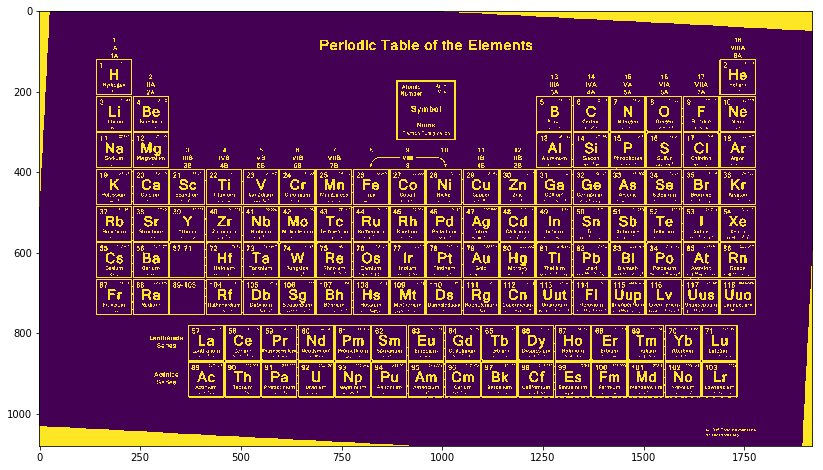

In [7]:
#image = cv2.imread("image_original.png")
image = cv2.imread("image_corrected_rotation.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, img_bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

img_bin = 255 - img_bin

plt.figure(figsize=(20,8))
plt.imshow(img_bin)

In [8]:
kernel_length = np.array(img_bin.shape[1]) // 80

In [9]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))

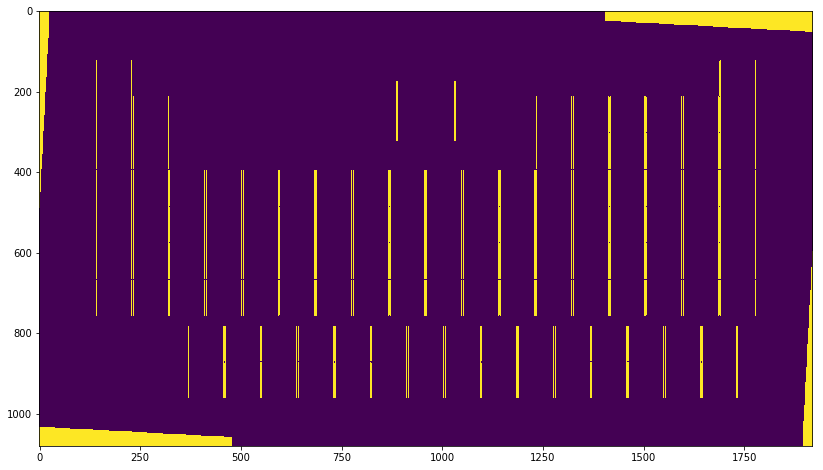

In [10]:
img_temp = cv2.erode(img_bin, vertical_kernel, iterations=2)
verticle_lines_img = cv2.dilate(img_temp, vertical_kernel, iterations=2)

plt.figure(figsize=(20,8))
plt.imshow(verticle_lines_img)

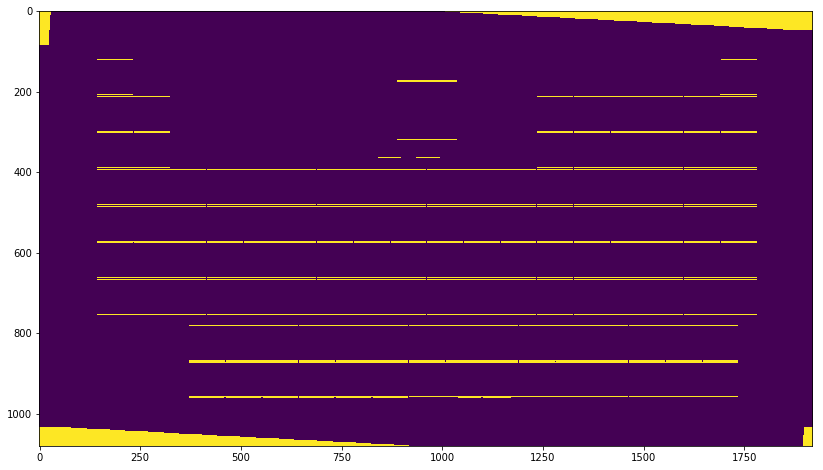

In [11]:
img_temp = cv2.erode(img_bin, horizontal_kernel, iterations=2)
horizontal_lines_img = cv2.dilate(img_temp, horizontal_kernel, iterations=2)

plt.figure(figsize=(20,8))
plt.imshow(horizontal_lines_img)

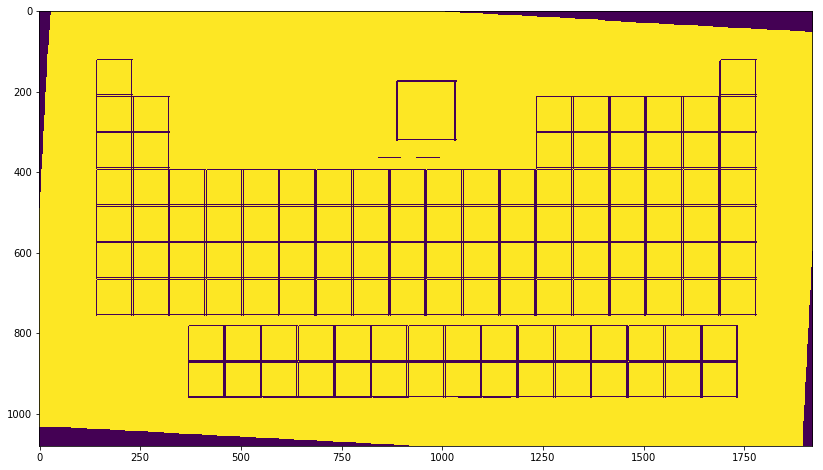

In [12]:
img_final_bin = cv2.addWeighted(verticle_lines_img, 1, horizontal_lines_img, 1, 60)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 127,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(20,8))
plt.imshow(img_final_bin)

In [14]:
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

idx = 0
for ctr in reversed(contours):    
              
            x, y, w, h = cv2.boundingRect(ctr)
            
            if (w > 80 and h > 80) and w == h: 
                roi = image[y:y+h, x:x+w]
                cv2.imwrite("data/{}".format(str(idx).zfill(3))+ ".png", roi)
                idx += 1